In [59]:
# Reference: https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

articles=['analysis data text normalization statistics technology','ai learning machine artificial intelligence','artificial intelligence ai','money bank','money bank','finance technology','fund bank money','basket ball player','diving stroke breathing','swing net ball player']
titles=['Data Science','Artificial intelligence','Machine Learning','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming','Tennis']

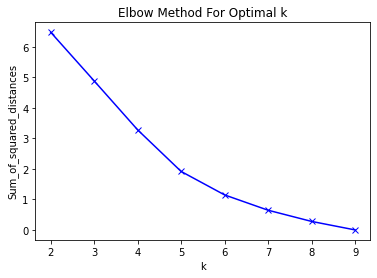

In [60]:
# Represent each document as a vector
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(articles)

# Using elbow method to determine the number of clusters
Sum_of_squared_distances = []
K = range(2,10)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
# Perform k-means clustering
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cls=pd.DataFrame(list(zip(titles,labels)),columns=['title','cluster'])
print(cls.sort_values(by=['cluster']))

                         title  cluster
0                 Data Science        0
5         Financial technology        0
7                   Basketball        1
9                       Tennis        1
3        European Central Bank        2
4                         Bank        2
6  International Monetary Fund        2
1      Artificial intelligence        3
2             Machine Learning        3
8                     Swimming        4
